In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
train_data = pd.read_csv("D:\\Datasets\\banglore housing data\\train_data.csv")

In [162]:
train_data.head()

,house_id,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,house_9442,Super built-up Area,Ready To Move,Abbigere,2 BHK,SLtias,795,2.0,1.0,32.54
1,house_2578,Super built-up Area,Ready To Move,Mallasandra,2 BHK,NaN,1340,2.0,2.0,61.00
2,house_8279,Super built-up Area,Ready To Move,Sector 2 HSR Layout,3 BHK,NDpalSe,1512,3.0,NaN,80.00
3,house_1584,Super built-up Area,19-Dec,Hoodi,3 BHK,Caycend,1512,3.0,2.0,75.77
4,house_4516,Plot Area,Ready To Move,RMV 2nd Stage,3 Bedroom,NaN,4470,3.0,NaN,700.00


In [163]:
train_data.shape

(10656, 10)

In [164]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_id      10656 non-null  object 
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  object 
 3   location      10656 non-null  object 
 4   size          10640 non-null  object 
 5   society       6253 non-null   object 
 6   total_sqft    10656 non-null  object 
 7   bath          10596 non-null  float64
 8   balcony       10189 non-null  float64
 9   price         10656 non-null  float64
dtypes: float64(3), object(7)
memory usage: 832.6+ KB


In [165]:
train_data.drop('society',axis=1,inplace=True)

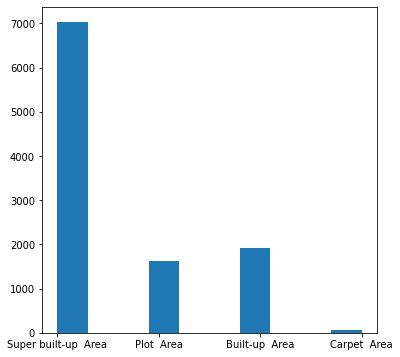

In [166]:
plt.figure(figsize=(6,6))
plt.hist(train_data['area_type'])
plt.show()

In [167]:
train_data['availability'].value_counts()

Ready To Move    8451
18-Dec            256
18-May            246
18-Apr            211
18-Aug            153
                 ... 
15-Jun              1
17-Jan              1
15-Dec              1
14-Nov              1
17-Feb              1
Name: availability, Length: 75, dtype: int64

In [168]:
train_data['availability'] = train_data['availability'].apply(lambda x : 1 if x == 'Ready To Move' else 0)

In [169]:
def convert_to_bedroom(x):
    s = str(x).split(' ')[0]
    return s

In [170]:
train_data['BHK'] = train_data['size'].apply(convert_to_bedroom)

In [171]:
a = train_data['BHK'].mode().iloc[0]
train_data['BHK'] = train_data['BHK'].apply(lambda x: a if x == 'nan' else x)
train_data['BHK'] = train_data['BHK'].apply(lambda x: float(x))

In [172]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [173]:
train_data['total_sqft'][~train_data['total_sqft'].apply(is_float)]

26       547.34 - 827.31
119          1200 - 2400
131          1100 - 1225
167          1660 - 1805
251          2830 - 2882
              ...       
10529          520 - 645
10577        1255 - 1350
10579        1020 - 1130
10635        2800 - 2870
10650          615 - 985
Name: total_sqft, Length: 204, dtype: object

In [174]:
def conversion(data):
    a = data.split('-')
    if len(a) == 2:
        return (float(a[0]) + float(a[1])) / 2
    try:
        return float(data)
    except:
        return None

In [175]:

train_data['total_sqft'] = train_data['total_sqft'].apply(conversion)
train_data['total_sqft'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10656 entries, 0 to 10655
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
10623 non-null  float64
dtypes: float64(1)
memory usage: 83.4 KB


In [176]:
num_col = ['total_sqft','bath','balcony']

In [177]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
train_data[num_col] = imputer.fit_transform(train_data[num_col])

In [178]:
train_data.isna().sum()

house_id         0
area_type        0
availability     0
location         0
size            16
total_sqft       0
bath             0
balcony          0
price            0
BHK              0
dtype: int64

In [179]:
train_data['location'].unique()

array(['Abbigere', 'Mallasandra', 'Sector 2 HSR Layout', ...,
       'BDS Layout', 'Hoskote near', 'Kalasipalya'], dtype=object)

In [180]:
train_data['location'].value_counts(ascending=True)

Kalasipalya                 1
Prakruthi Township          1
T C Palya main Road         1
Vijayabank bank layout      1
Whitefield ECC Road         1
                         ... 
Thanisandra               184
Kanakpura Road            212
Electronic City           246
Sarjapur  Road            318
Whitefield                445
Name: location, Length: 1196, dtype: int64

In [181]:
location_value_less_than_10 = train_data.location.value_counts()[train_data.location.value_counts() < 10]
train_data['location'] = train_data['location'].apply(lambda x: 'other' if x in location_value_less_than_10 else x)

In [182]:
df = pd.DataFrame(train_data['location'].unique())

In [183]:
df

,0
0,Abbigere
1,Mallasandra
2,Sector 2 HSR Layout
3,Hoodi
4,other
...,...
216,Cunningham Road
217,Sarakki Nagar
218,Kodigehaali
219,Narayanapura


In [184]:
from sklearn.preprocessing import OneHotEncoder

ohe_encoder_location = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_area = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [185]:
location_transform = pd.DataFrame(ohe_encoder_location.fit_transform(train_data[['location']]),columns=list(ohe_encoder_location.categories_[0]))

In [186]:
location_transform.shape

(10656, 221)

In [187]:
train_data = pd.concat([train_data,location_transform],axis=1)

In [188]:
train_data['location'].isnull().sum()

0

In [189]:
area_type_transform = pd.DataFrame(ohe_area.fit_transform(train_data[['area_type']]), columns=list(ohe_area.categories_[0]))

In [190]:
train_data = pd.concat([train_data,area_type_transform],axis=1)

In [191]:
train_data.drop('size',axis=1,inplace=True)

In [192]:
train_data['price_per_sqft'] = (train_data['price']*100000)/train_data['total_sqft']

In [193]:
corr = train_data.corr()
corr['price']

availability            0.031507
total_sqft              0.562314
bath                    0.457050
balcony                 0.129154
price                   1.000000
                          ...   
Built-up  Area         -0.029426
Carpet  Area           -0.013515
Plot  Area              0.281201
Super built-up  Area   -0.187289
price_per_sqft          0.025446
Name: price, Length: 232, dtype: float64

### Checking some outliers

In [194]:
train_data.describe()

,availability,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
count,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,...,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,1.065600e+04
mean,0.793074,1562.774237,2.691348,1.607451,112.617980,2.806025,0.000938,0.001032,0.001877,0.001971,...,0.016235,0.002909,0.001126,0.006381,0.233202,0.180743,0.006757,0.152778,0.659722,8.221334e+03
std,0.405121,1284.408163,1.335079,0.804315,142.661727,1.301843,0.030621,0.032114,0.043284,0.044351,...,0.126384,0.053861,0.033540,0.079632,0.422890,0.384823,0.081925,0.359790,0.473825,1.187561e+05
min,0.000000,1.000000,1.000000,0.000000,8.440000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.678298e+02
25%,1.000000,1100.000000,2.000000,1.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.272562e+03
50%,1.000000,1280.000000,2.000000,2.000000,72.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.448497e+03
75%,1.000000,1683.000000,3.000000,2.000000,120.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.325783e+03
max,1.000000,52272.000000,40.000000,3.000000,2912.000000,43.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+07


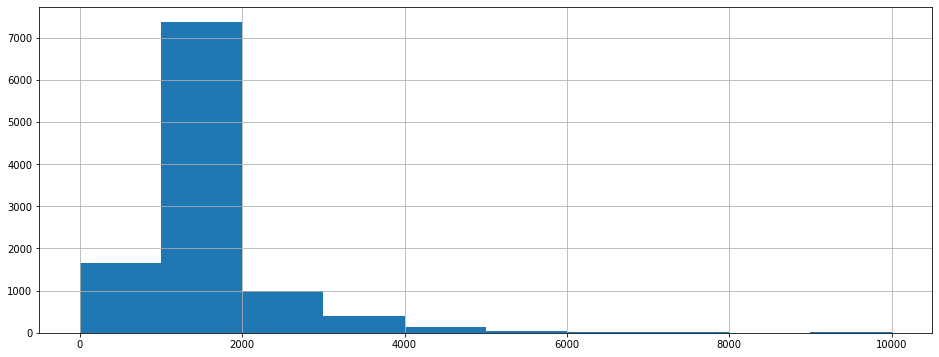

In [195]:
plt.figure(figsize=(16,6))
pd.cut(train_data['total_sqft'], bins= [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, np.inf], labels=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]).hist()
plt.show()

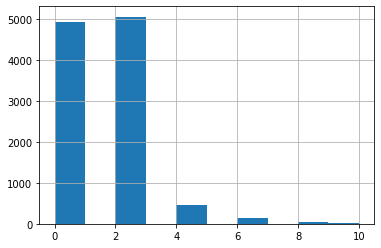

In [196]:
pd.cut(train_data['BHK'], bins=[0, 2, 4, 6, 8, 10, np.inf], labels=[0, 2, 4, 6, 8, 10]).hist()
plt.show()

In [197]:
train_data[train_data.total_sqft / train_data.BHK < 300].head(3)

,house_id,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
7,house_3418,Plot Area,1,Kumaraswami Layout,1270.0,4.0,1.0,128.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10078.740157
39,house_3511,Plot Area,1,Uttarahalli,1200.0,7.0,2.0,225.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18750.000000
41,house_6505,Plot Area,1,Yeshwanthpur,2400.0,6.0,2.0,270.0,9.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11250.000000


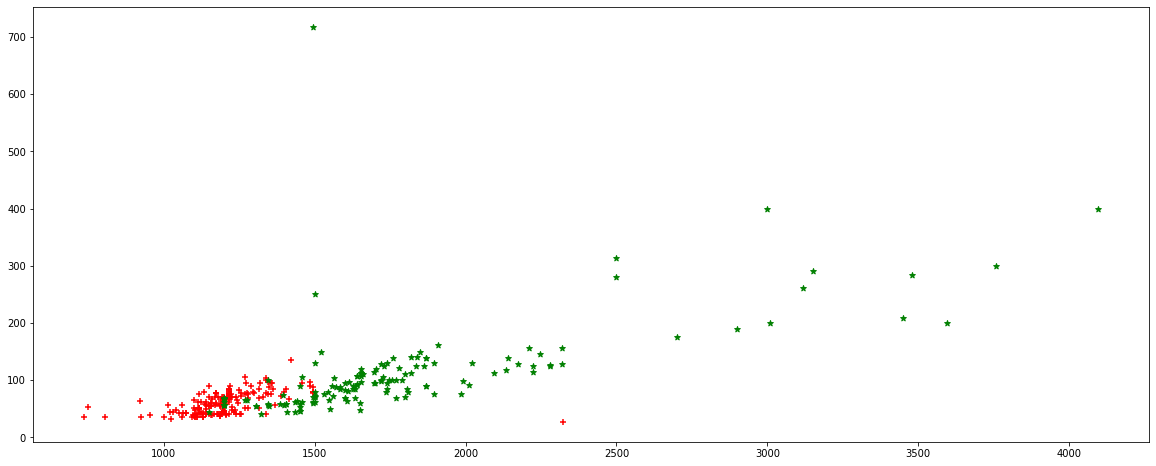

In [198]:
plt.figure(figsize=(20,8))
cond2 = ((train_data.location == 'Whitefield') & (train_data.BHK == 2))
cond3 = ((train_data.location == 'Whitefield') & (train_data.BHK == 3))
plt.scatter(train_data.loc[cond2, 'total_sqft'], train_data.loc[cond2, 'price'], marker ='+', color='red')
plt.scatter(train_data.loc[cond3, 'total_sqft'], train_data.loc[cond3, 'price'], marker ='*', color='green')
plt.show()

In [199]:
train_data = train_data[~(train_data.total_sqft / train_data.BHK < 300)]

In [200]:
train_data.shape

(10062, 235)

In [201]:
train_data.price_per_sqft.describe()

count    10062.000000
mean      6314.451684
std       3905.578348
min        267.829813
25%       4212.025777
50%       5305.794343
75%       6932.530120
max      76923.076923
Name: price_per_sqft, dtype: float64

In [202]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [203]:
train_data = remove_price_per_sqft_outliers(train_data)

In [204]:
train_data.shape

(8209, 235)

In [205]:
train_data.drop(['location','area_type'],axis = 1,inplace=True)

### Model Creation

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_data.drop('price',axis=1),train_data.price,test_size=0.2,random_state=42)

In [207]:
X_train_id = X_train.house_id
X_val_id = X_val.house_id

In [208]:
X_train = X_train.drop('house_id',axis=1)
X_train = X_train.drop('price_per_sqft',axis=1)

X_val = X_val.drop('price_per_sqft',axis=1)
X_val = X_val.drop('house_id',axis=1)

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [210]:
models = [DecisionTreeRegressor(),RandomForestRegressor()]
names = ['Decision Tree','Random Forest']

In [211]:
from sklearn.model_selection import cross_val_score

In [212]:
for name,model in zip(names,models):
    print(f'{name}')
    score = cross_val_score(model,X_train,y_train,cv=3)
    print(f'score : {score}')
    print('--------------------------------------------------------------')


Decision Tree
score : [0.56773069 0.66359971 0.68470217]
--------------------------------------------------------------
Random Forest
score : [0.70621845 0.83346207 0.81807458]
--------------------------------------------------------------


In [213]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [214]:
y_pred_lr = lr_clf.predict(X_val)

In [215]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_val)

In [216]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_val)

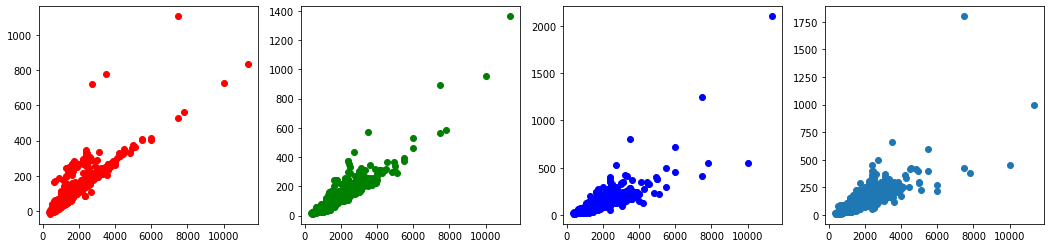

In [236]:
fig,ax = plt.subplots(nrows=1,ncols=4,figsize = (18,4))
ax[0].scatter(X_val['total_sqft'],y_pred_lr,color = 'r')
ax[1].scatter(X_val['total_sqft'],y_pred_rf,color = 'g')
ax[2].scatter(X_val['total_sqft'],y_pred_dt,color = 'b')
ax[3].scatter(X_val['total_sqft'],y_val)
plt.show()

From the above plots we observe that random forest prediction is more accurate

In [256]:
test_data = pd.read_csv("D:\\Datasets\\banglore housing data\\test_data.csv")

In [257]:
test_data_id = test_data['house_id']

In [258]:
test_data.drop(['society', 'house_id'],axis=1, inplace=True)

In [259]:
test_data['availability'] = test_data['availability'].apply(lambda x : 1 if x == 'Ready To Move' else 0)

In [260]:
test_data['BHK'] = test_data['size'].apply(convert_to_bedroom)

In [261]:
test_data['BHK'] = test_data['BHK'].apply(lambda x: float(x))

In [262]:
test_data.total_sqft.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1332 entries, 0 to 1331
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
1320 non-null   float64
dtypes: float64(1)
memory usage: 10.5 KB


In [263]:
test_data['total_sqft'][~test_data['total_sqft'].apply(is_float)]

Series([], Name: total_sqft, dtype: float64)

In [264]:
test_data[num_col] = imputer.transform(test_data[num_col])

In [265]:
test_data['location'].fillna(test_data['location'].mode()[0],inplace=True)

In [266]:
test_data.location.isnull().sum()

0

In [267]:
location_transform = pd.DataFrame(ohe_encoder_location.transform(test_data[['location']]),columns=list(ohe_encoder_location.categories_[0]))

In [268]:
test_data = pd.concat([test_data, location_transform], axis=1)

In [269]:
area_type_transform = pd.DataFrame(ohe_area.transform(test_data[['area_type']]), columns=list(ohe_area.categories_[0]))
test_data = pd.concat([test_data, area_type_transform], axis=1)

In [270]:
test_data.drop(['size','location','area_type'],axis=1,inplace=True)

In [271]:
final_test_data, final_cv = test_data.align(X_train, join='left', axis=1, fill_value=0.0)

In [272]:
y_pred = rf.predict(final_test_data)

In [280]:
prediction  = pd.DataFrame(pd.concat([test_data_id,pd.Series(y_pred)],axis=1))

In [281]:
prediction

,house_id,0
0,house_5,62.333300
1,house_16,52.792664
2,house_29,51.956910
3,house_31,44.927745
4,house_41,61.653304
...,...,...
1327,house_13268,250.890000
1328,house_13285,78.149071
1329,house_13286,74.927401
1330,house_13295,99.855182


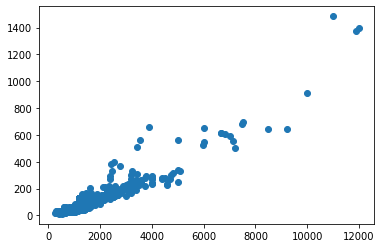

In [283]:
plt.scatter(final_test_data['total_sqft'],prediction[0])
plt.show()

In [286]:
prediction.to_csv("D:\Machine Learning\Projects\ML Projects (Sk learn Library).csv",index=False)